# Building Bolcks For Deep-Learning

In [1]:
from ipywidgets import interact
from fastai.basics import *

In [2]:
plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: 
        plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: 
        plt.title(title)

## Mathematical Function we want to approximate, usually is unknown

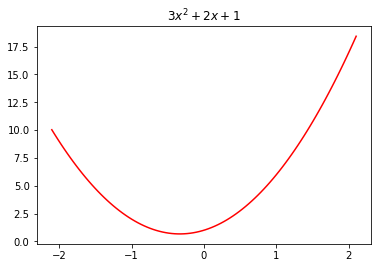

In [3]:
def f(x): 
    return 3*x**2 + 2*x + 1

plot_function(f, "$3x^2 + 2x + 1$")

In [4]:
def quad(a, b, c, x): 
    return a*x**2 + b*x + c

In [5]:
def mk_quad(a, b, c):
    return partial(quad, a, b, c)

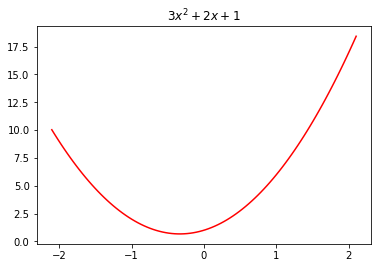

In [6]:
f2 = mk_quad(3, 2, 1)
plot_function(f2, "$3x^2 + 2x + 1$")

In [7]:
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)

In [8]:
np.random.seed(42)

x = torch.linspace(-2, 2, steps=20)[:,None]
y = add_noise(f(x), 0.15, 1.5)

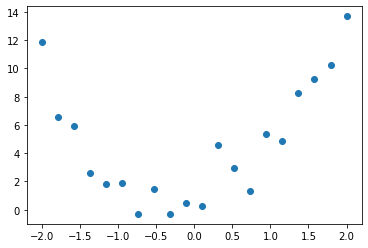

In [9]:
plt.scatter(x,y);

In [10]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    plt.scatter(x,y)
    plot_function(mk_quad(a,b,c), ylim=(-3,13))

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

## Loss Function to minimize

In [11]:
def mae(y_true, y_pred):
    return torch.abs(y_true - y_pred).mean()

In [12]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    f = mk_quad(a,b,c)
    plt.scatter(x,y)
    loss = mae(f(x), y)
    plot_function(f, ylim=(-3,12), title=f"MAE: {loss:.2f}")

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

## Stochastic Gradient Descent

In [13]:
def quad_mae(abc):
    f = mk_quad(*abc)
    return mae(f(x), y)

In [14]:
abc = torch.tensor([1.1, 1.1, 1.1]).requires_grad_()

In [15]:
for i in range(10):
    loss = quad_mae(abc)
    loss.backward()
    with torch.no_grad():
        abc -= 0.1 * abc.grad
        print(f'iteration {i}: mae {loss}')

iteration 0: mae 2.4218544652326717
iteration 1: mae 2.213718624935926
iteration 2: mae 1.8164027770425484
iteration 3: mae 1.4034977278380247
iteration 4: mae 1.1613496041052298
iteration 5: mae 1.5542304890198644
iteration 6: mae 1.9741292265566088
iteration 7: mae 2.2342570868643024
iteration 8: mae 2.1990399864824512
iteration 9: mae 1.8684778836878042


# Rectified Linear Units

In [16]:
# RELU
def rectified_linear(x, m, b):
    y = m*x + b
    return torch.clip(y, 0.)

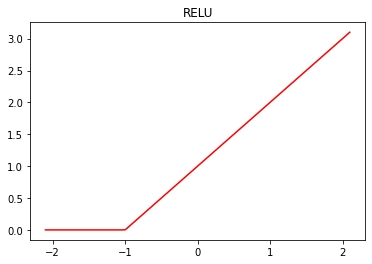

In [17]:
plot_function(partial(rectified_linear, 1, 1), title="RELU")

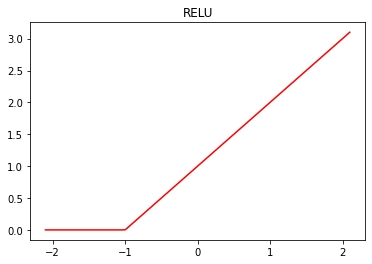

In [18]:
import torch.nn.functional as F
def rectified_linear(x, m, b):
    return F.relu(m*x + b)

plot_function(partial(rectified_linear, 1, 1), title="RELU")

In [19]:
@interact(m=1.5, b=1.5)
def plot_relu(m, b):
    plot_function(partial(rectified_linear, m,b), ylim=(-1,4))

interactive(children=(FloatSlider(value=1.5, description='m', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [20]:
def triple_relu(m1,b1,m2,b2, m3, b3, x):
    return rectified_linear(m1,b1,x) + rectified_linear(m2,b2,x) + rectified_linear(m3,b3,x)

@interact(m1=-1.5, b1=-1.5, m2=1.5, b2=1.5, m3=1.5, b3=1.5)
def plot_triple_relu(m1, b1, m2, b2, m3, b3):
    plot_function(partial(triple_relu, m1,b1,m2,b2,m3,b3), ylim=(-1,6))

interactive(children=(FloatSlider(value=-1.5, description='m1', max=1.5, min=-4.5), FloatSlider(value=-1.5, de…